In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1589,2020-09-10,United Kingdom,354996.0,355219.0,41622.0,41594.0,-223.0,28.0
1590,2020-09-10,Germany,254834.0,255366.0,9347.0,9341.0,-532.0,6.0
1591,2020-09-10,Iran,394810.0,393425.0,22776.0,22669.0,1385.0,107.0
1592,2020-09-10,Turkey,284616.0,284943.0,6828.0,6837.0,-327.0,-9.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9439.054579673777
RMSE =  36331.74664918136


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  304.0401505646173
RMSE =  748.6698417827322


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  67723.64900662252
RMSE =  114438.46026579797
-- World performances for deaths --
MAE =  1727.3774834437086
RMSE =  2105.5724929763896


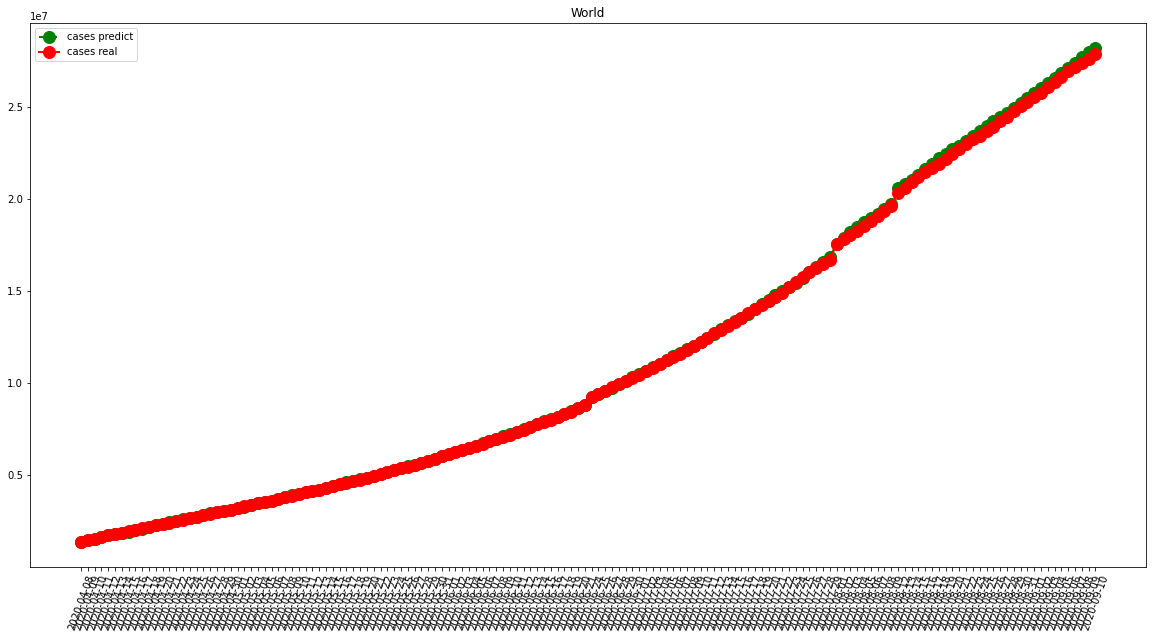

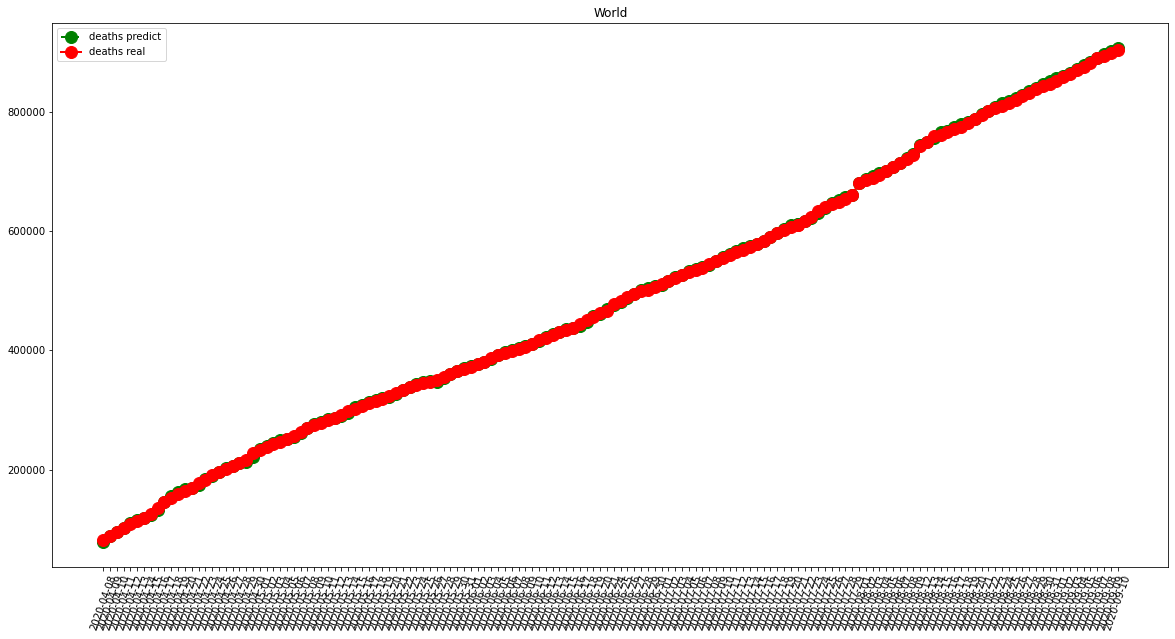

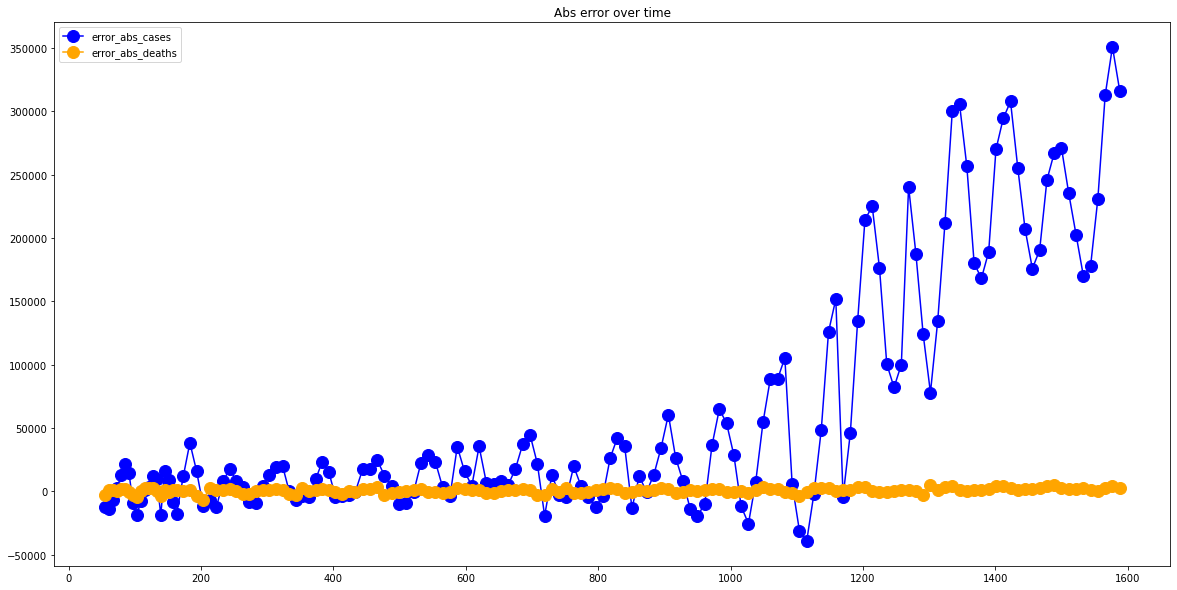

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1052.0124223602484
RMSE =  1573.513566544432
-- France performances for deaths --
MAE =  116.8944099378882
RMSE =  264.4025492965871


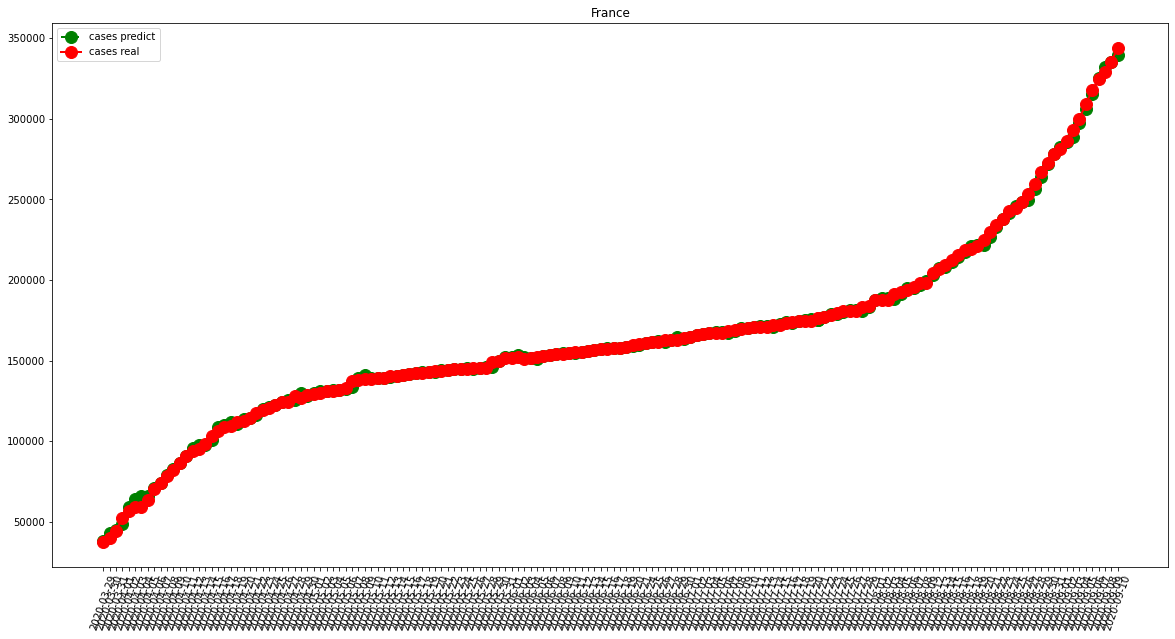

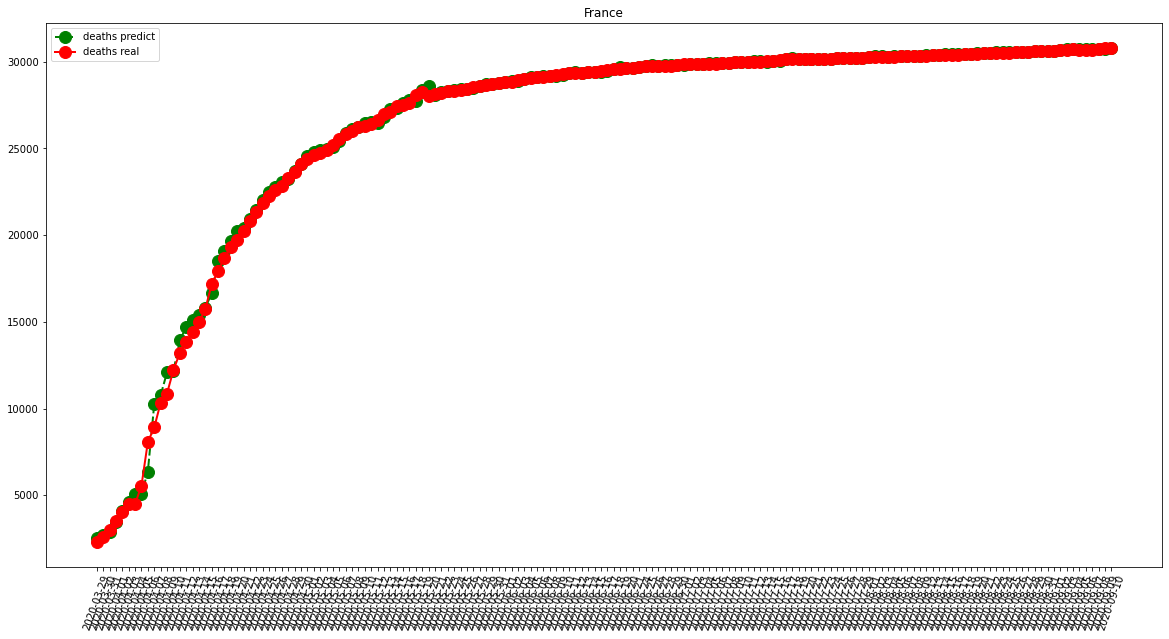

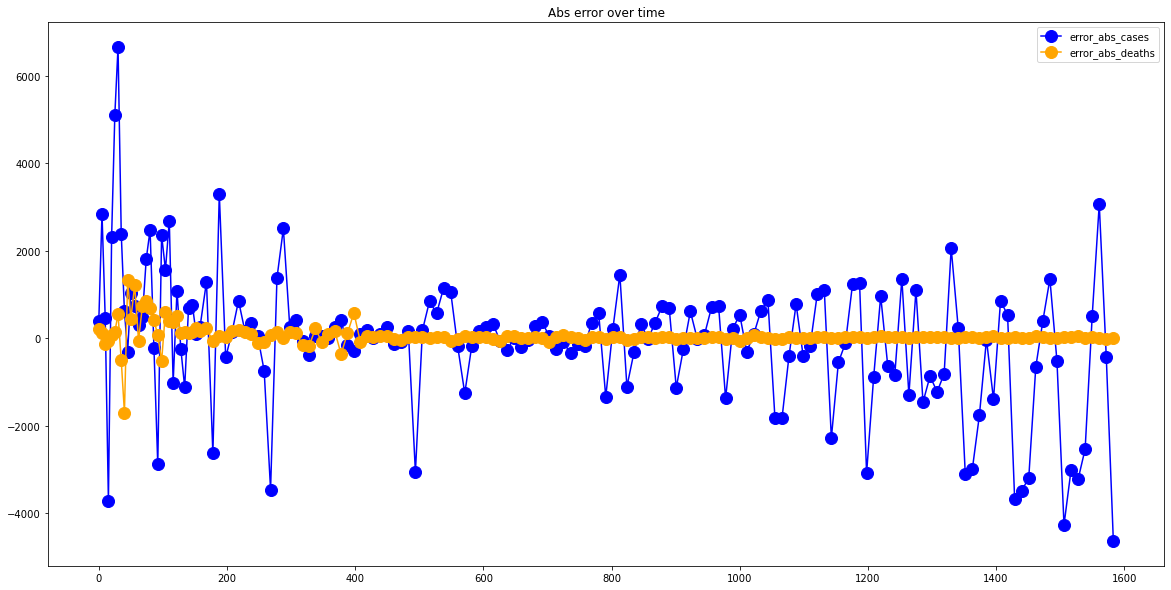

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  307.3664596273292
RMSE =  453.8437359333747
-- Italy performances for deaths --
MAE =  70.1304347826087
RMSE =  233.98506880217857


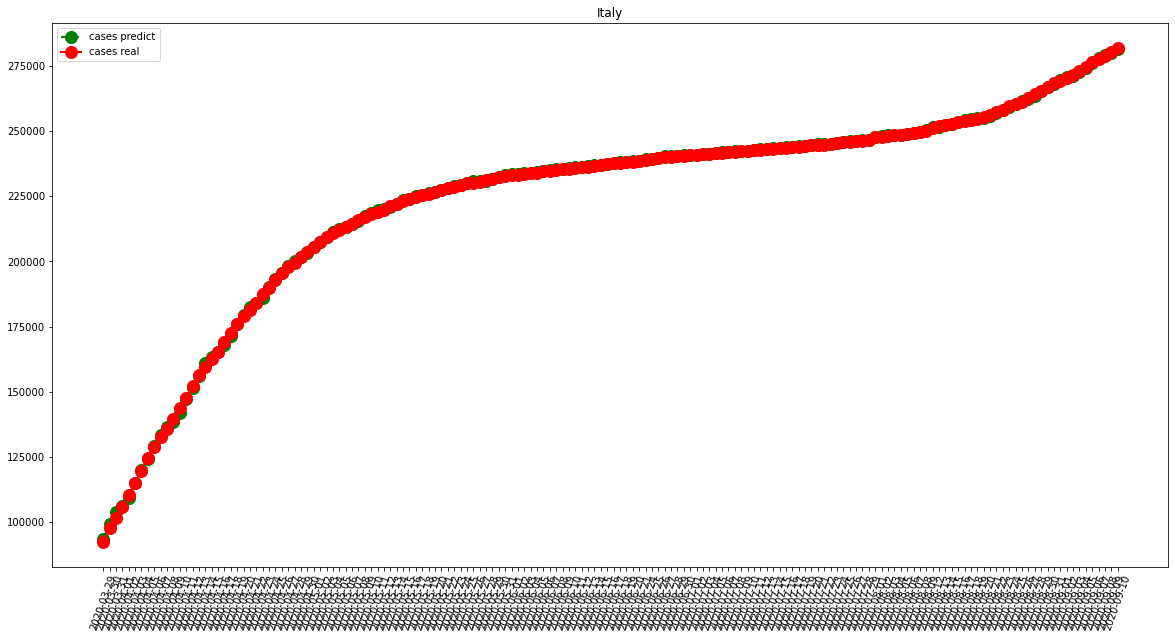

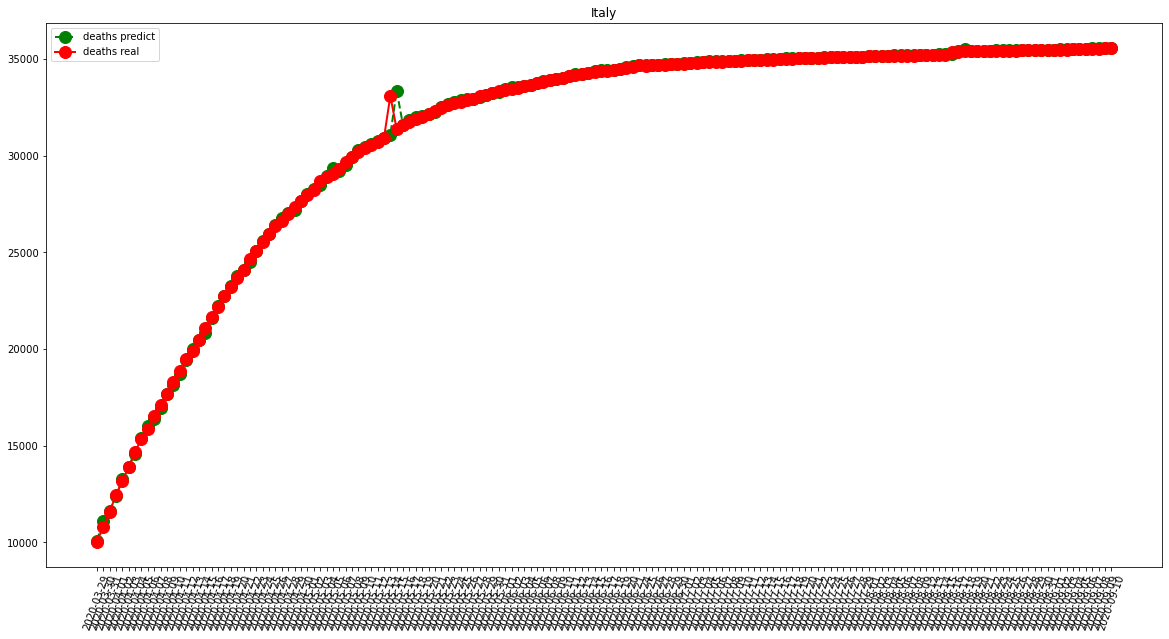

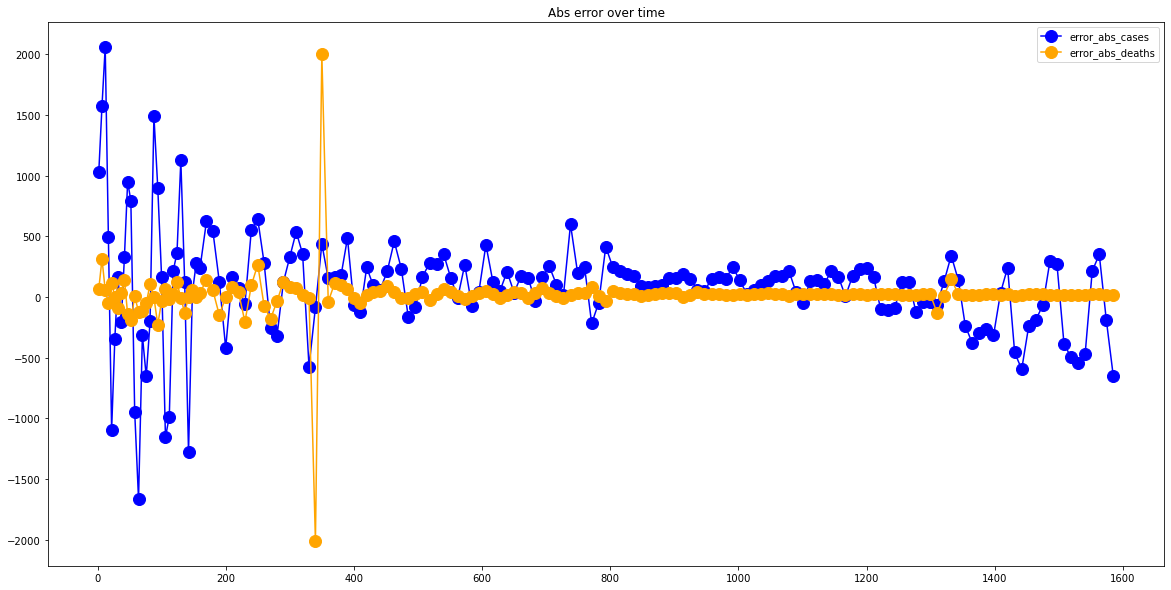

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2231.4037267080744
RMSE =  4398.618782361866
-- Spain performances for deaths --
MAE =  123.2111801242236
RMSE =  320.8535878632503


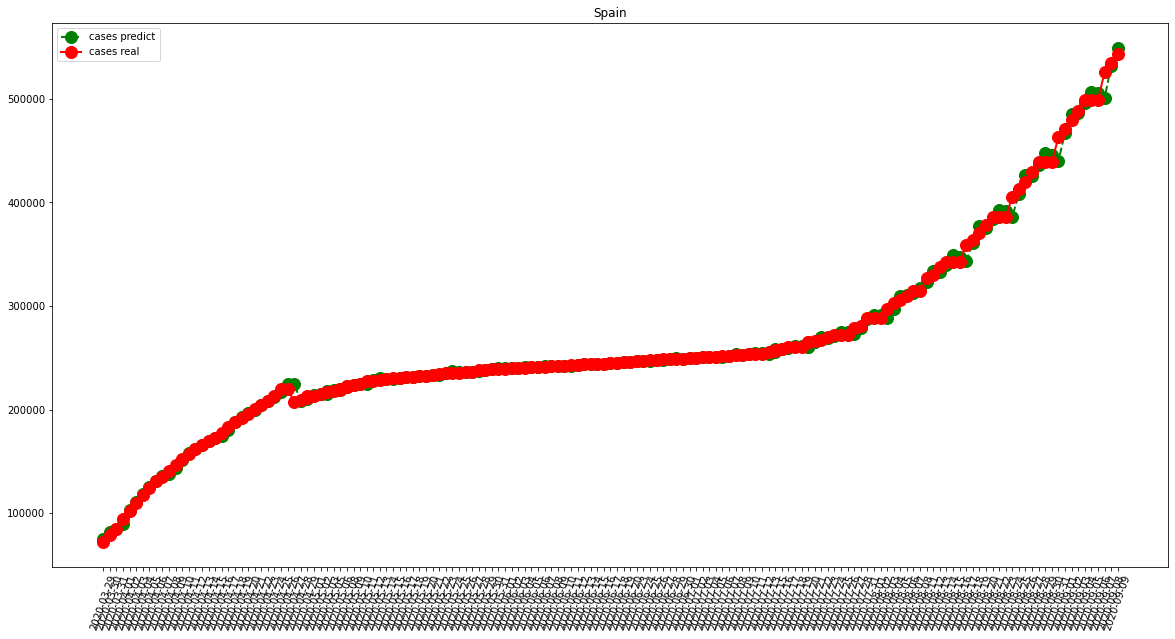

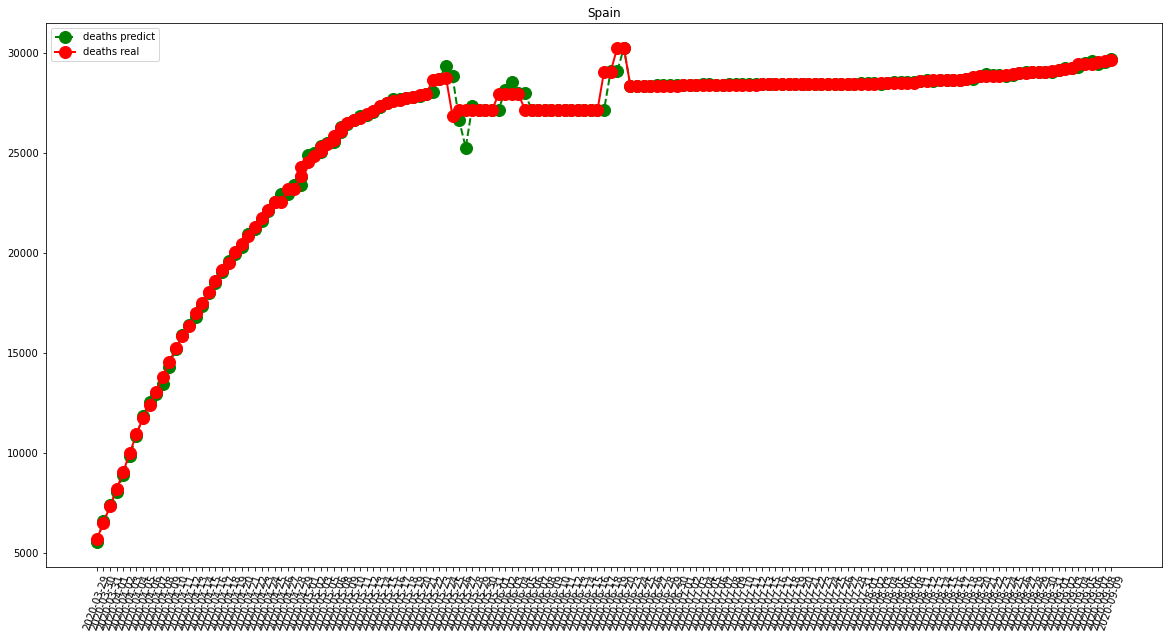

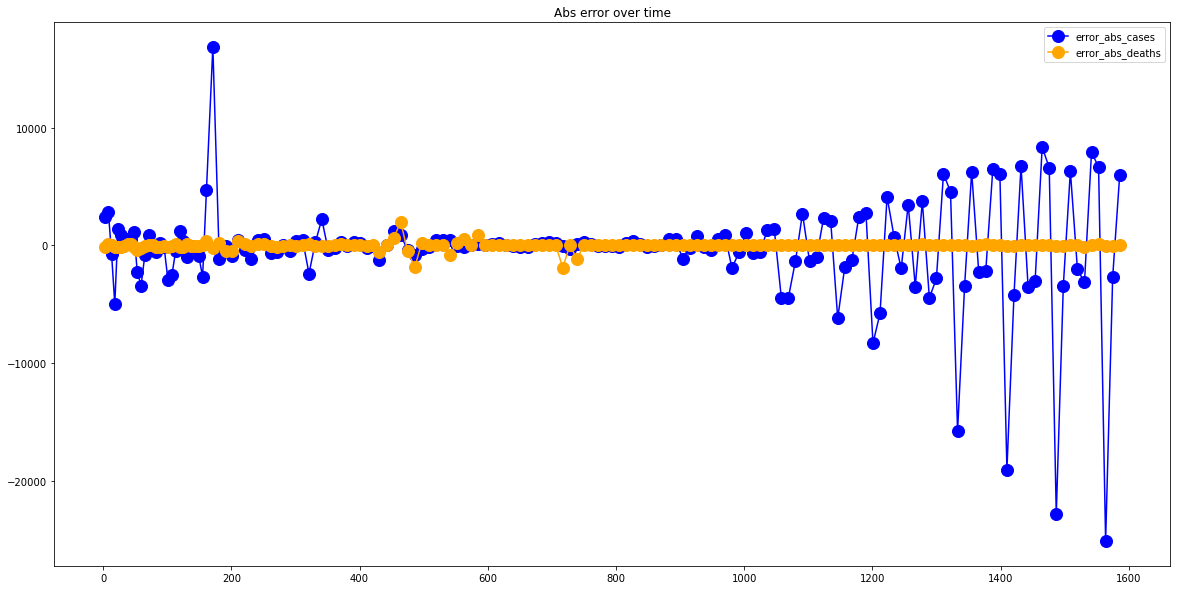

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14083.987577639751
RMSE =  21725.83215311537
-- United States performances for deaths --
MAE =  486.45962732919253
RMSE =  683.163612715966


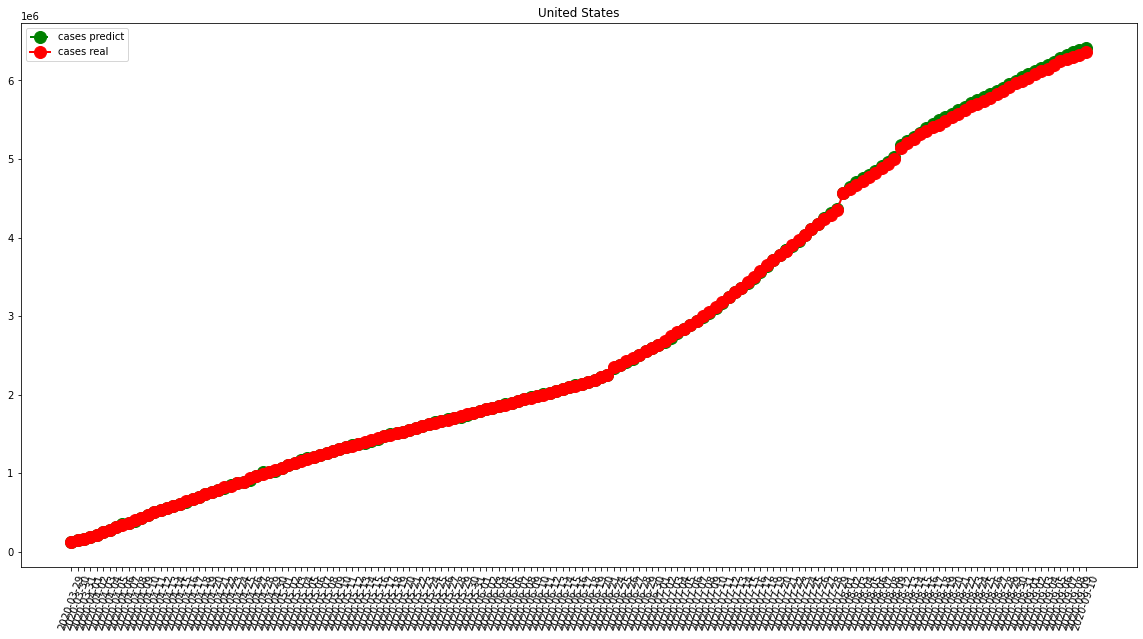

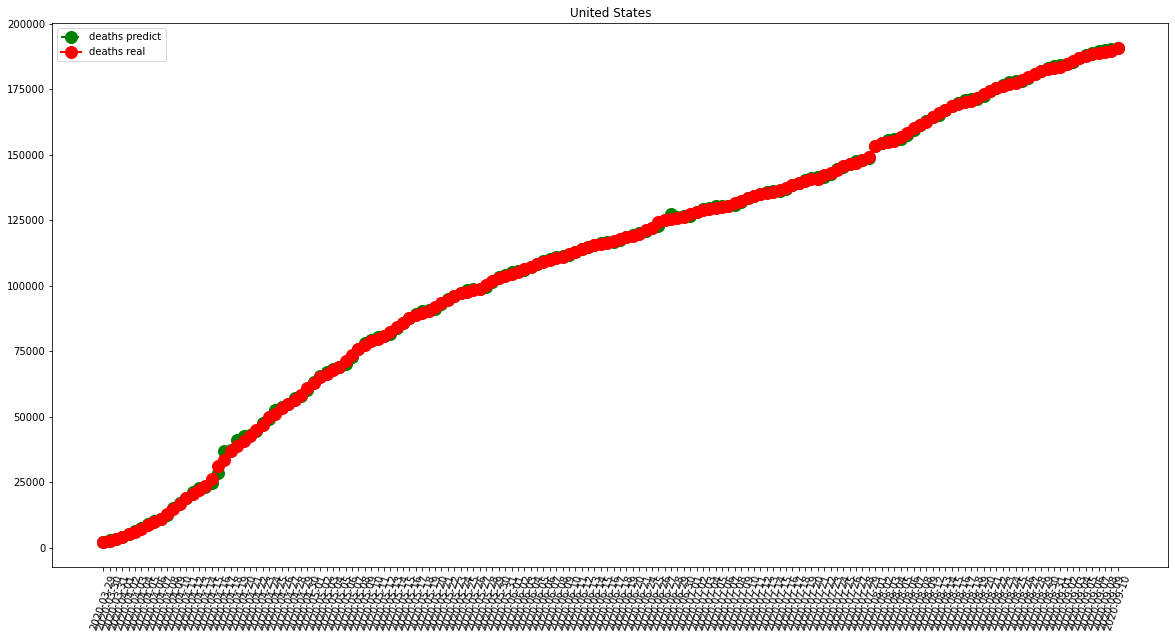

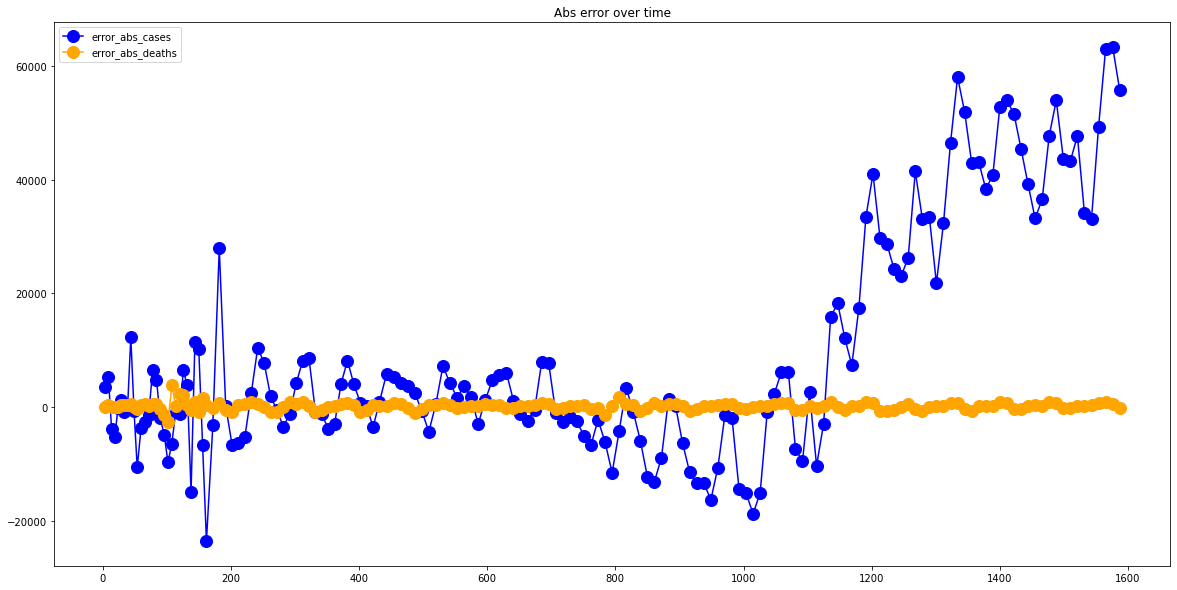

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  62.65217391304348
RMSE =  94.06866132500377
-- China performances for deaths --
MAE =  26.180124223602483
RMSE =  123.75865613743589


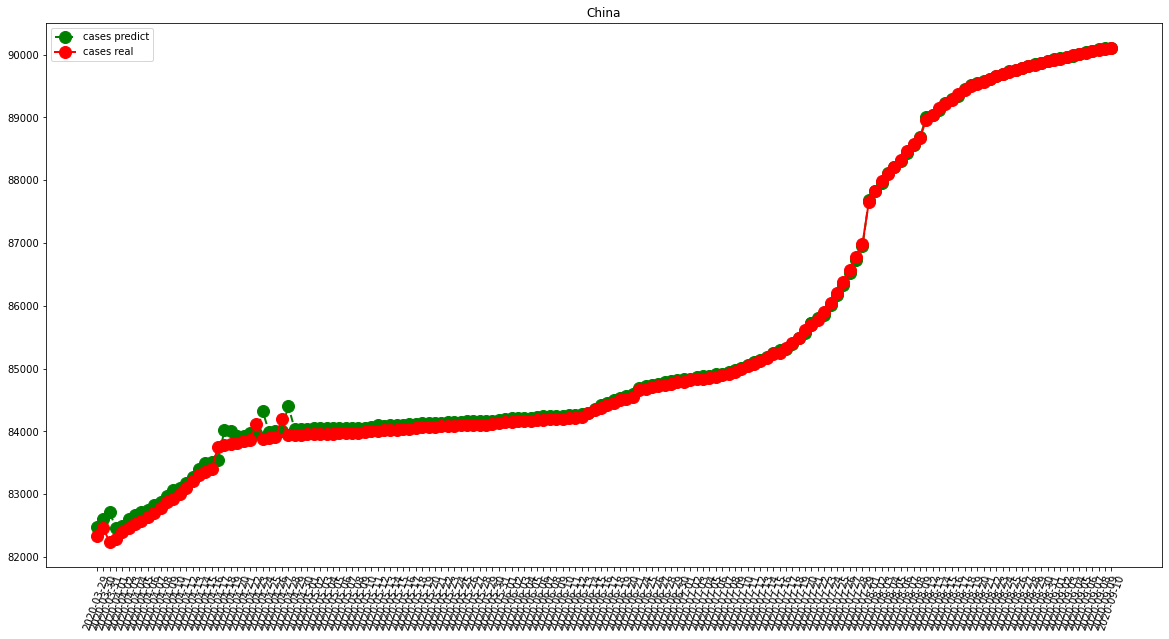

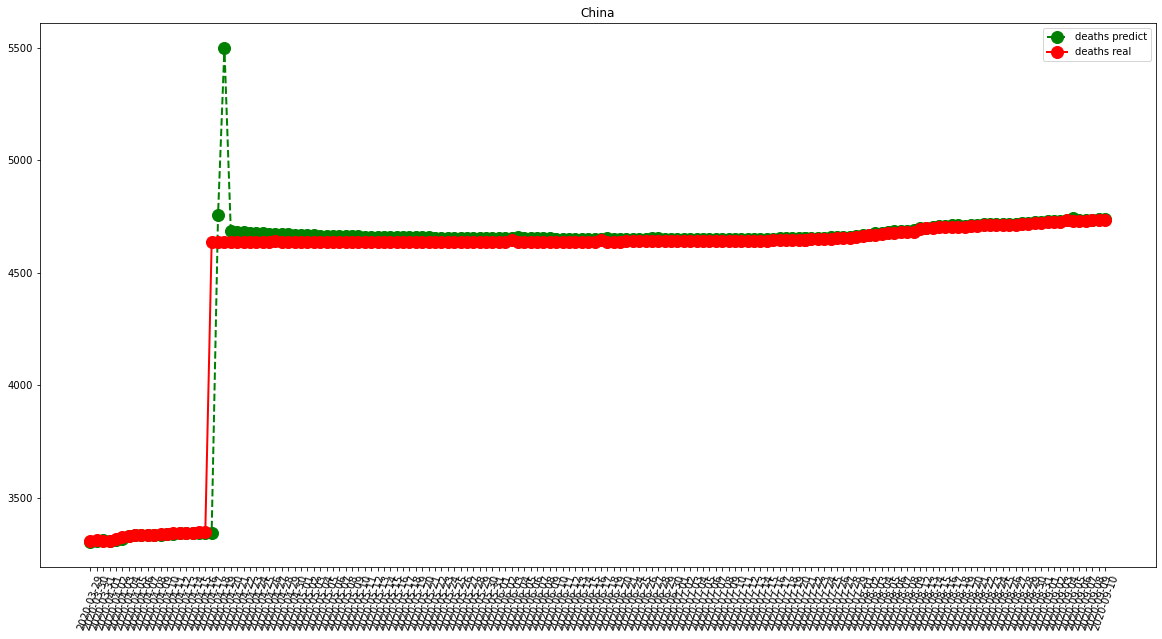

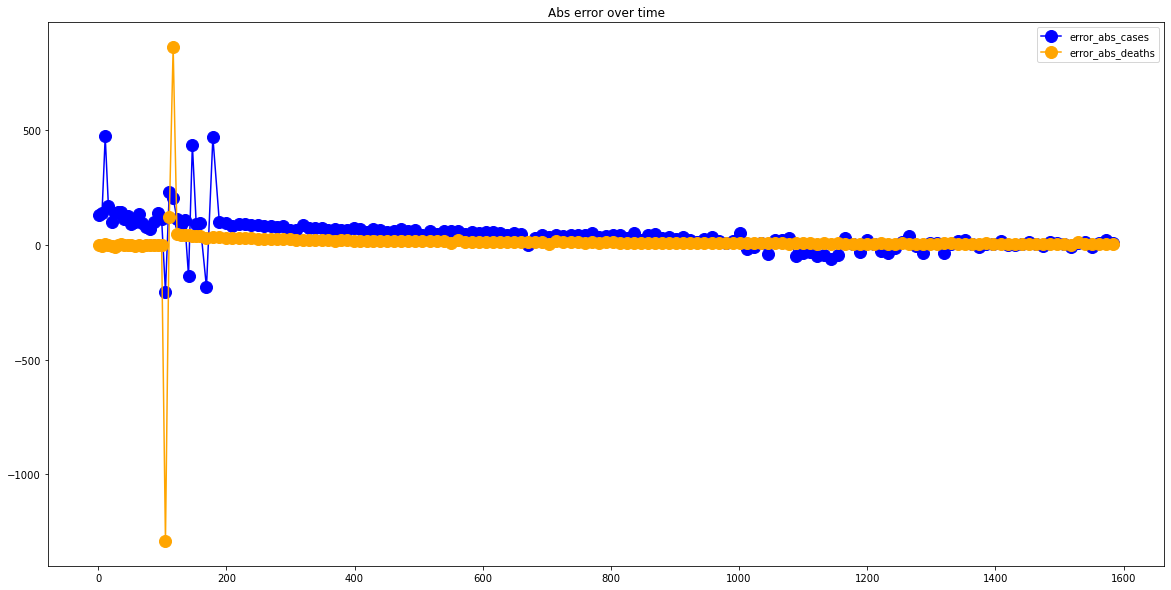

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1020.9323308270676
RMSE =  3629.8452068323672
-- United Kingdom performances for deaths --
MAE =  229.38345864661653
RMSE =  740.047610742318


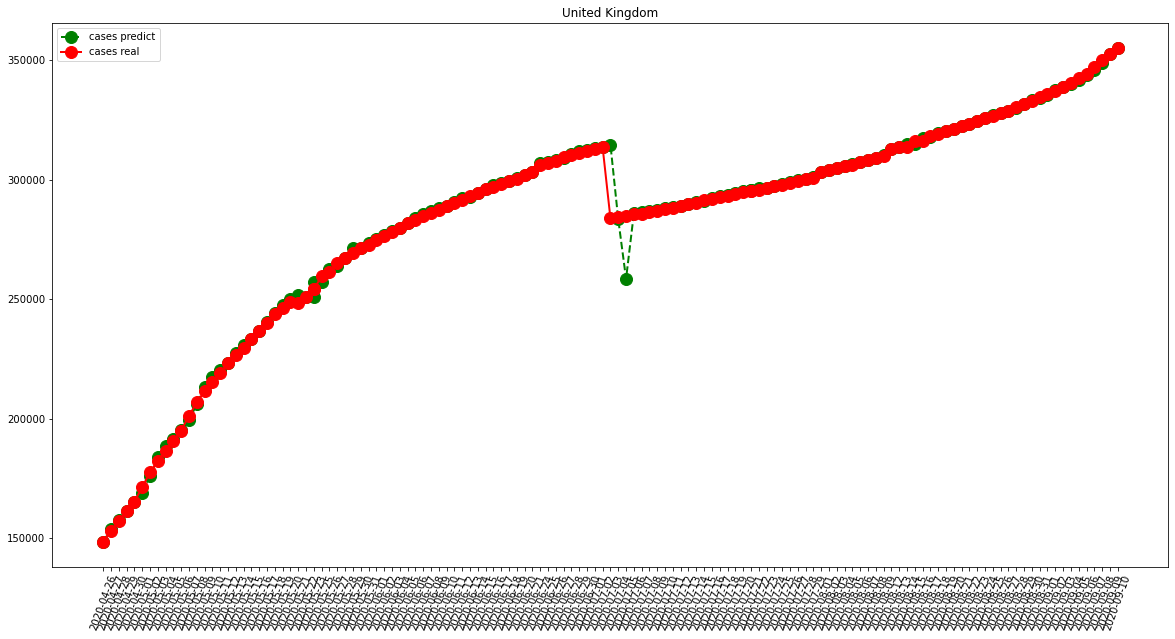

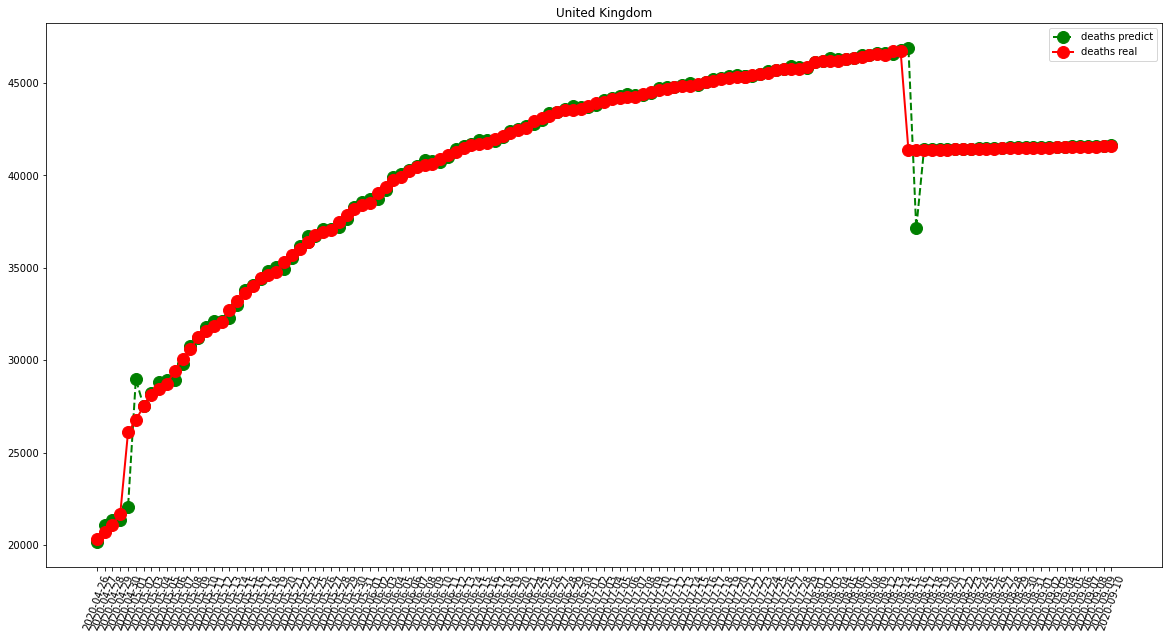

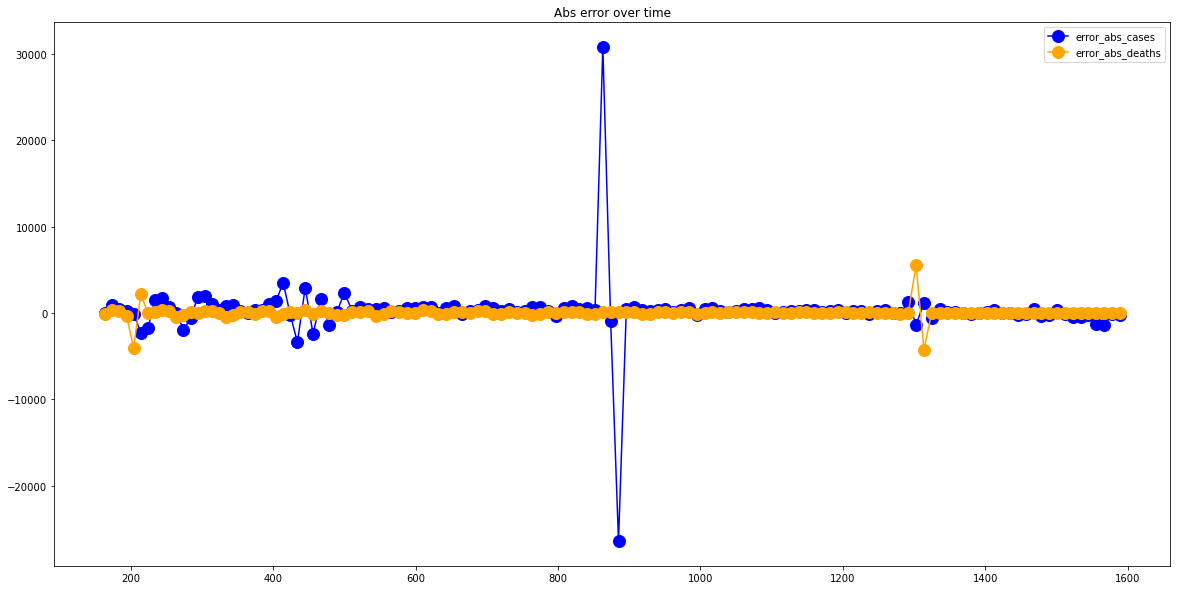

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  407.30827067669173
RMSE =  583.719471195395
-- Germany performances for deaths --
MAE =  20.015037593984964
RMSE =  38.156976914032974


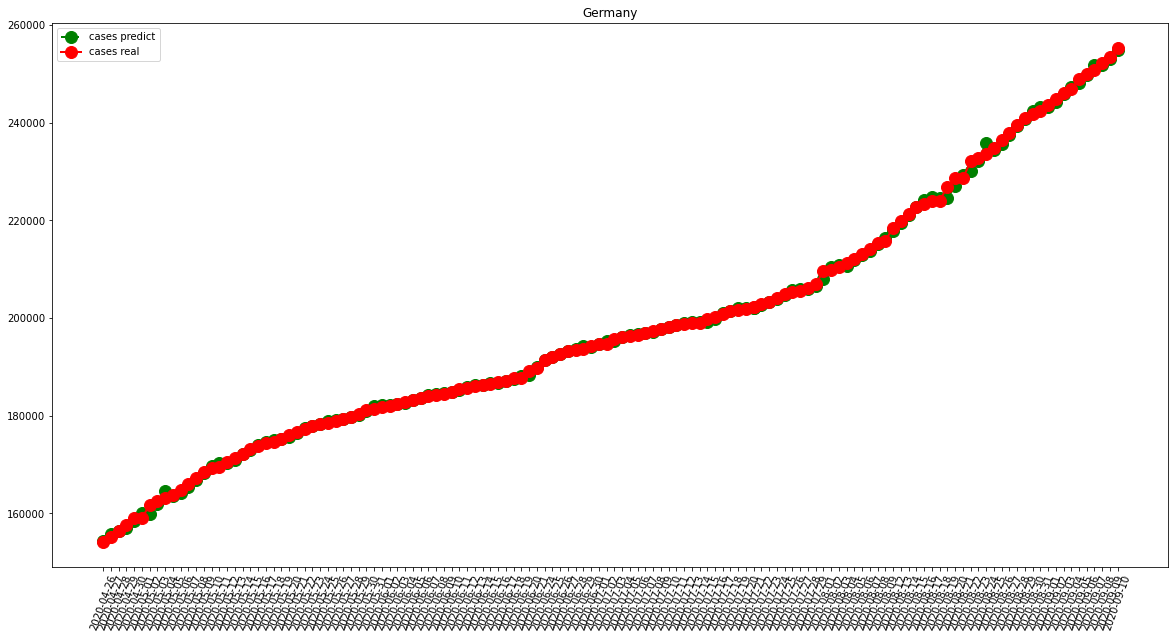

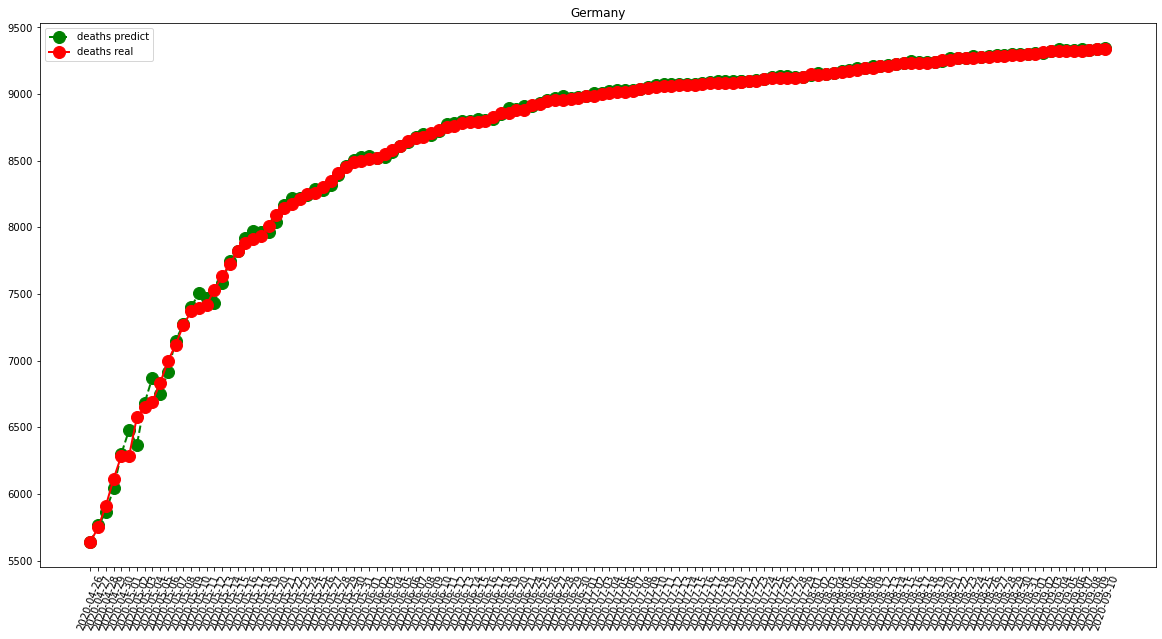

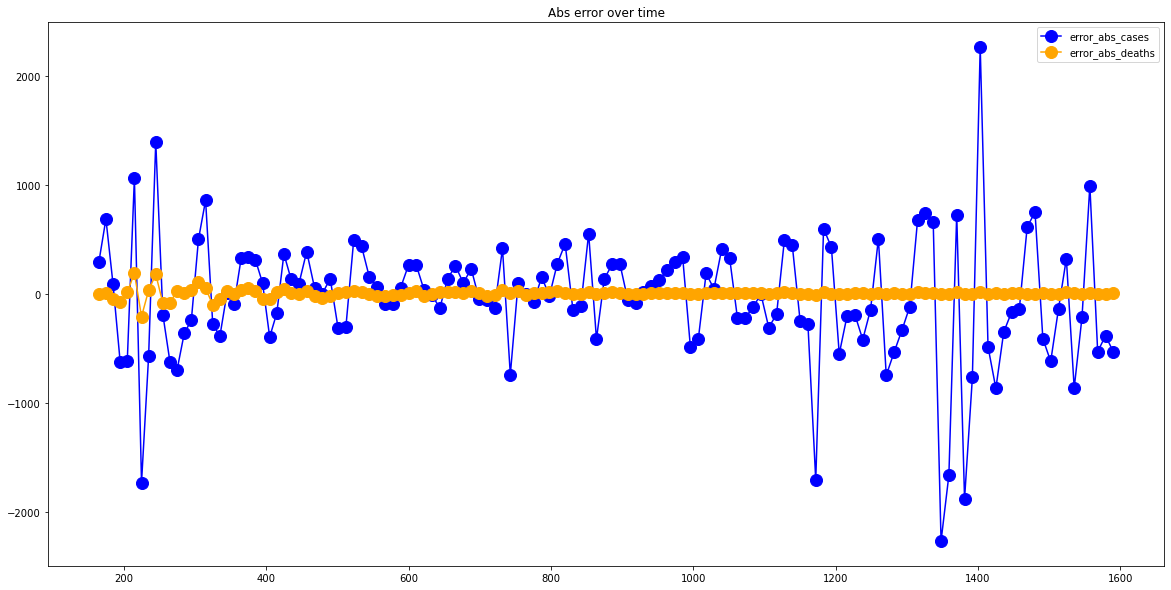

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  871.7443609022556
RMSE =  1241.2108749484214
-- Iran performances for deaths --
MAE =  49.796992481203006
RMSE =  85.49444866118326


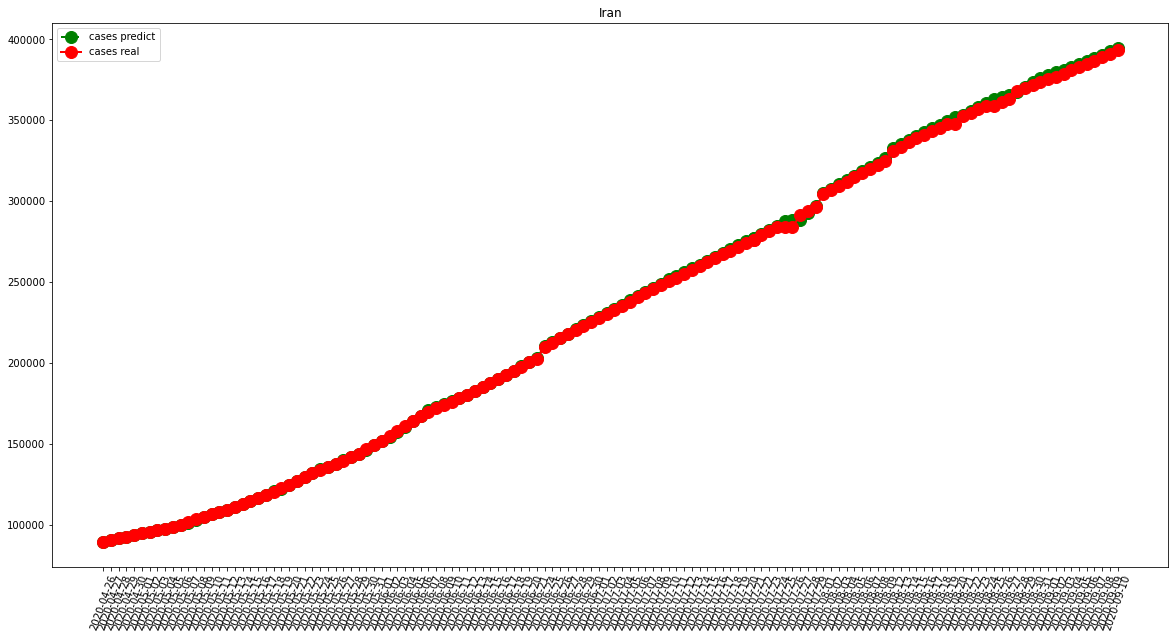

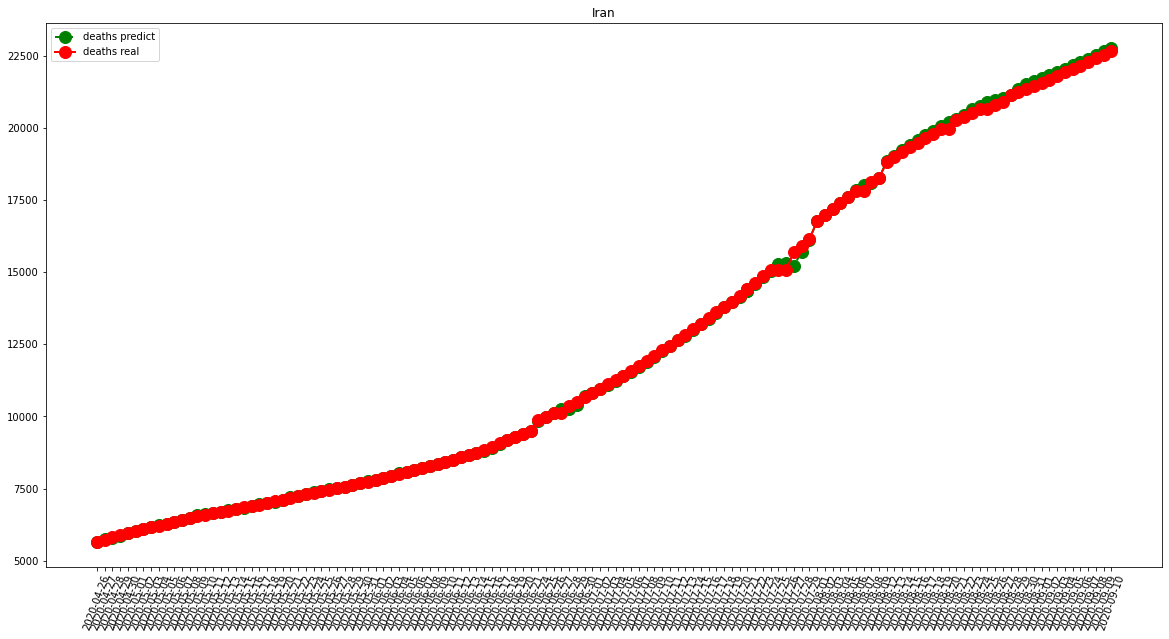

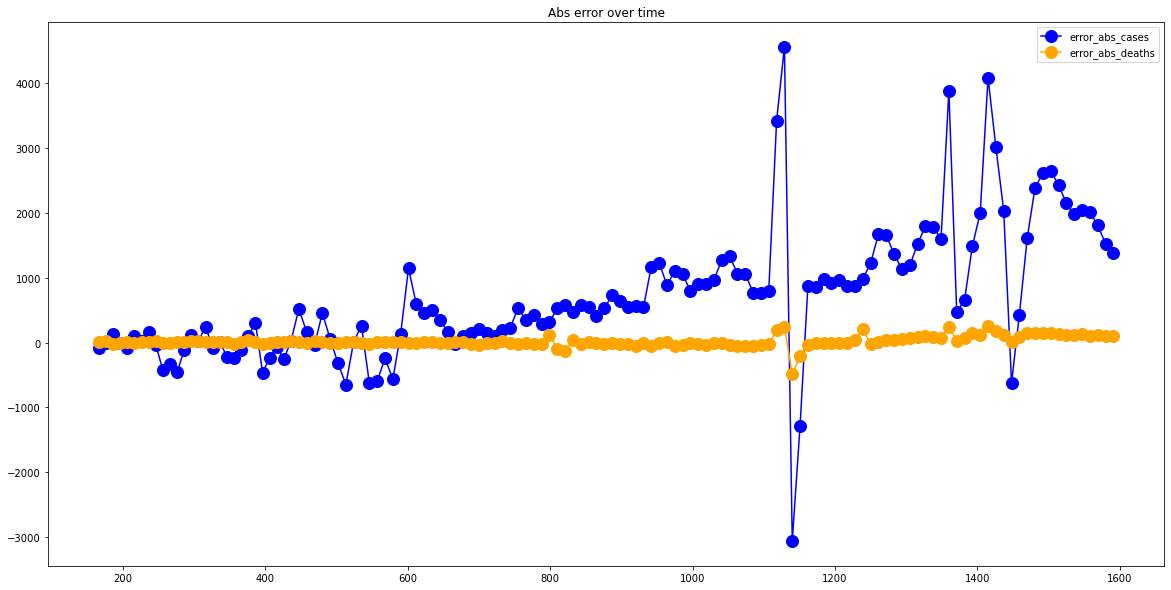

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  211.78195488721803
RMSE =  327.7974227719612
-- Turkey performances for deaths --
MAE =  16.05263157894737
RMSE =  88.13758042235314


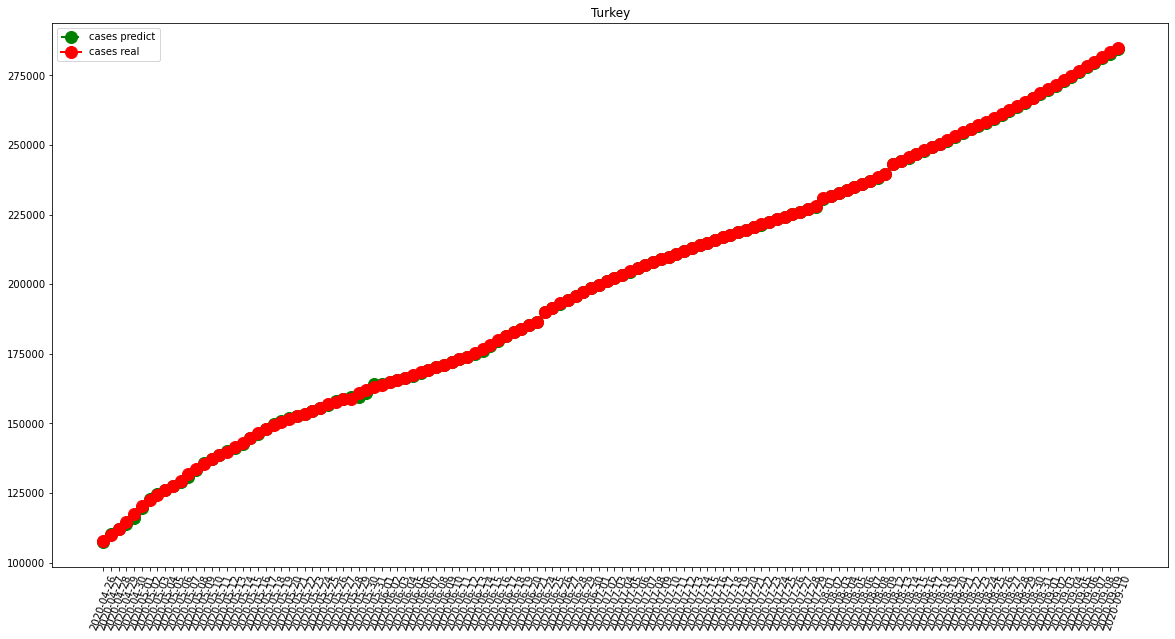

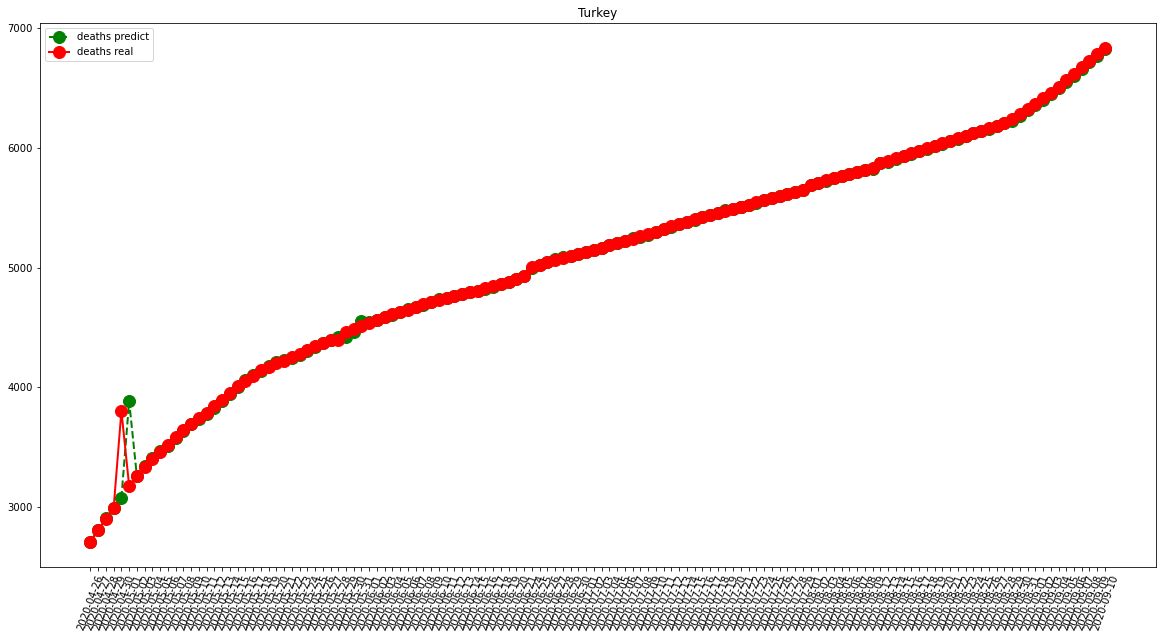

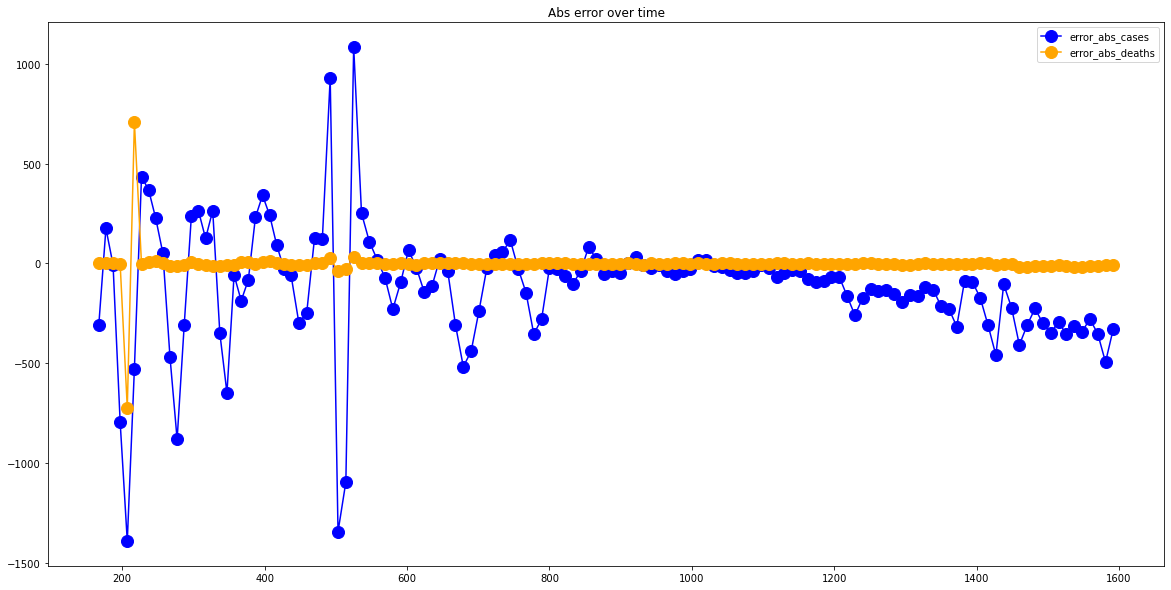

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15375.396226415094
RMSE =  20602.708302001425
-- Brazil performances for deaths --
MAE =  465.99056603773585
RMSE =  572.2228504403138


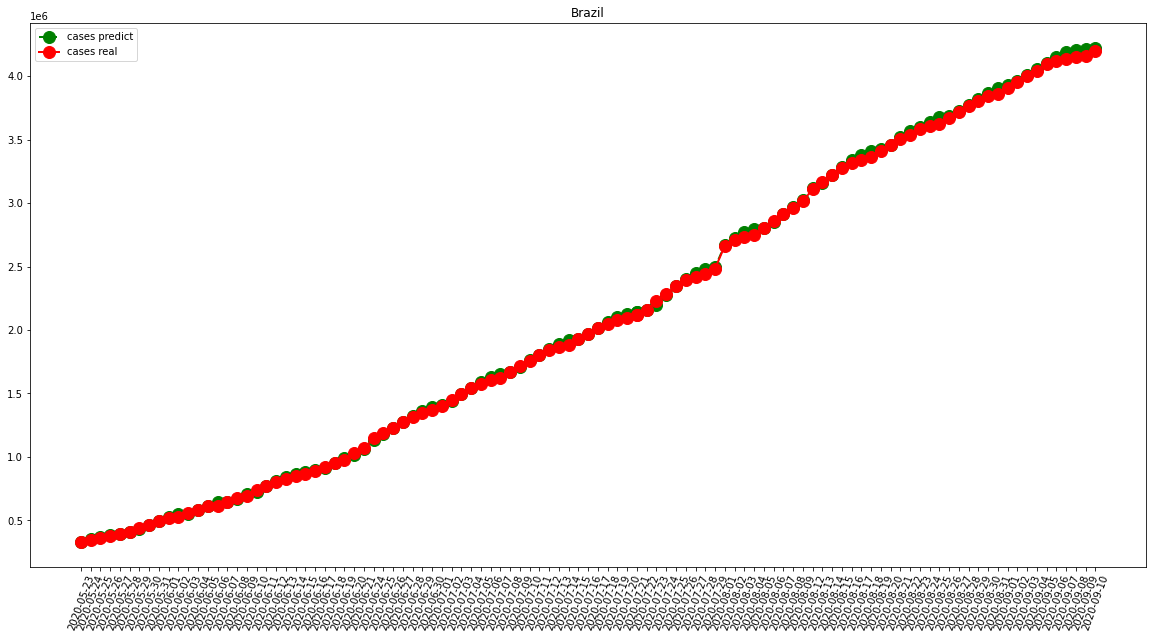

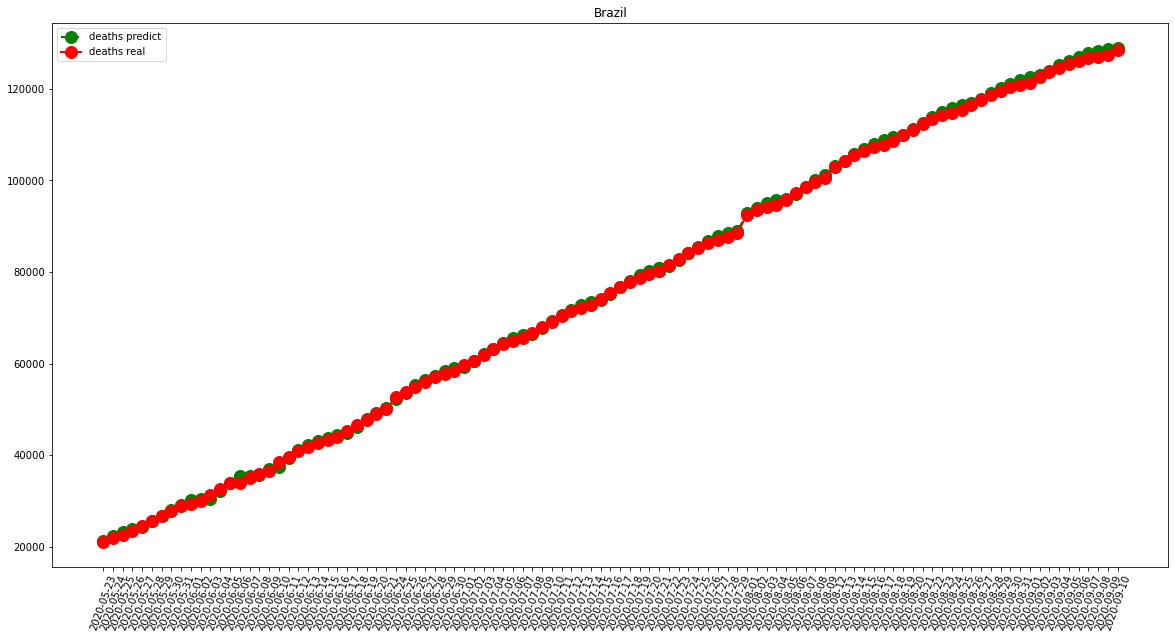

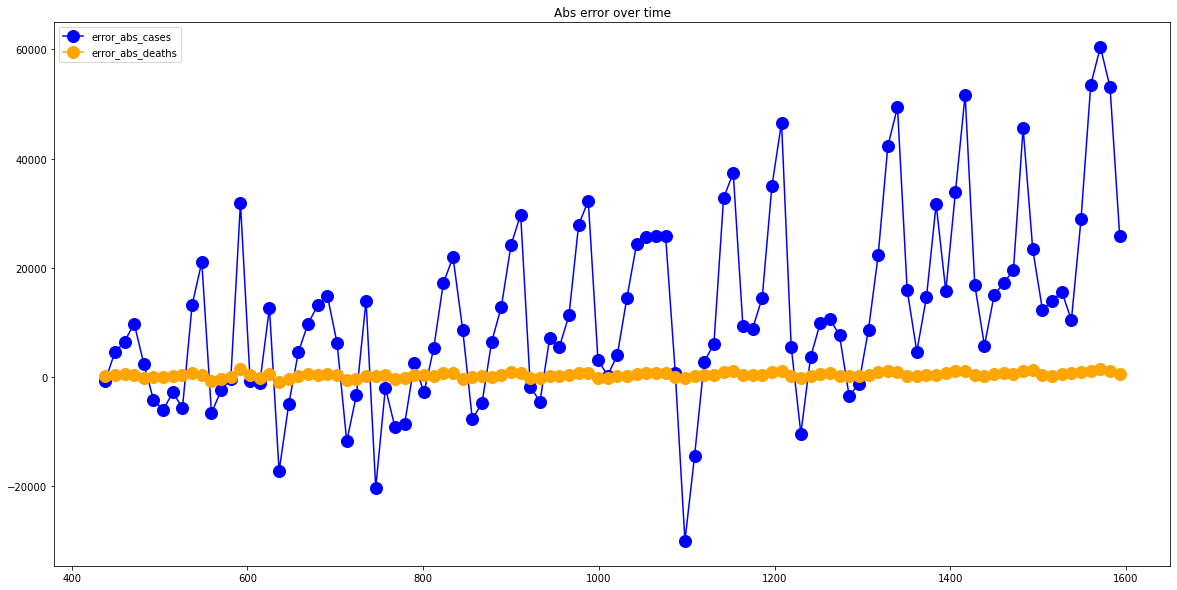

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)